# 2. Create clean Dataset

## Import dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning dataset

In [2]:
df = pd.read_csv('/Users/cenkyagkan/Desktop/OMM/7.Semester/Applied Data Analytics/Leasing_risk/Dataset1/train_u6lujuX_CVtuZ9i.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Removing features that have no informative value

In [4]:
#Removing Loan_Status because a custom label is to be created later
df = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


### Remove missing values

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

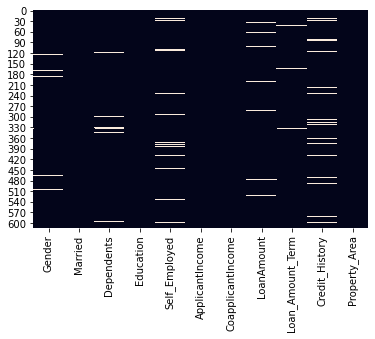

In [5]:
sns.heatmap(df.isnull(), cbar=False)
df.isna().sum()

<AxesSubplot:>

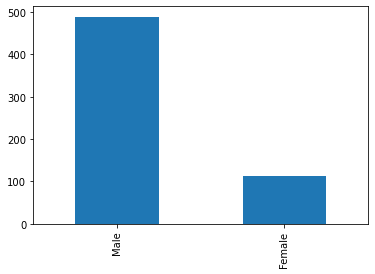

In [6]:
df.Gender.value_counts().plot(kind='bar')

In [7]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [8]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [9]:
# Usage of most_frequent strategy for categorical variable -> Gender
from sklearn.impute import SimpleImputer
x_string = df.Gender.to_numpy().reshape(-1, 1)
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.Gender=imp.fit_transform(x_string)

In [10]:
df.isna().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [11]:
# Usage of most_frequent strategy for categorical variable -> Married
x_string = df.Married.to_numpy().reshape(-1, 1)
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.Married=imp.fit_transform(x_string)

In [12]:
df.isna().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [13]:
# Usage of most_frequent strategy for categorical variable -> Dependents
x_string = df.Dependents.to_numpy().reshape(-1, 1)
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.Dependents=imp.fit_transform(x_string)

In [14]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

<AxesSubplot:>

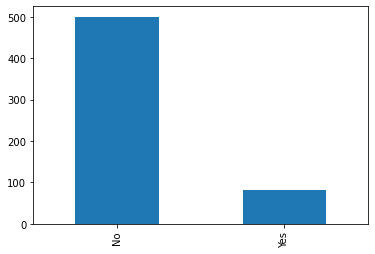

In [15]:
df.Self_Employed .value_counts().plot(kind='bar')

In [16]:
# Usage of most_frequent strategy for categorical variable -> Self_Employed
x_string = df.Self_Employed.to_numpy().reshape(-1, 1)
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.Self_Employed=imp.fit_transform(x_string)

In [17]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

<AxesSubplot:>

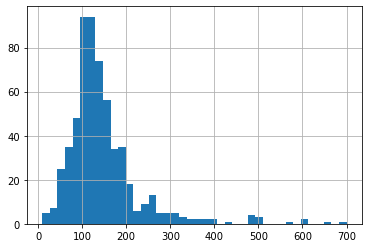

In [18]:
df.LoanAmount.hist(bins = 40)

<AxesSubplot:>

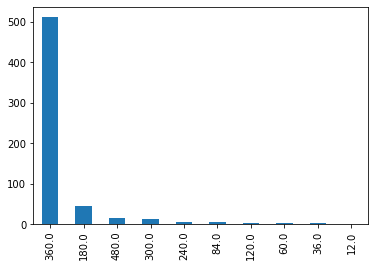

In [19]:
df.Loan_Amount_Term.value_counts().plot(kind='bar')

In [20]:
# Usage of most_frequent strategy for categorical variable -> Loan_Amount_Term
x_string = df.Loan_Amount_Term.to_numpy().reshape(-1, 1)
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df.Loan_Amount_Term=imp.fit_transform(x_string)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


In [24]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
dtype: int64

In [25]:
# Usage of most_frequent strategy for categorical variable -> LoanAmount
x_string = df.LoanAmount.to_numpy().reshape(-1, 1)
imp = SimpleImputer(missing_values=np.nan, strategy='median')
df.LoanAmount=imp.fit_transform(x_string)

<AxesSubplot:>

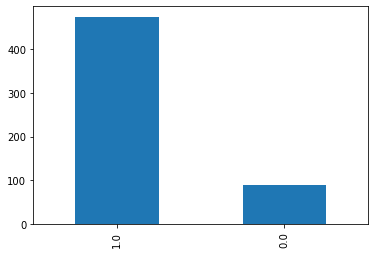

In [26]:
df.Credit_History.value_counts().plot(kind='bar')

In [27]:
df =  df.drop('Credit_History', axis = 1)

In [28]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
dtype: int64

## Creation of custom dataset for leasing risk usecase

### Shaping Loan amount

<AxesSubplot:ylabel='Frequency'>

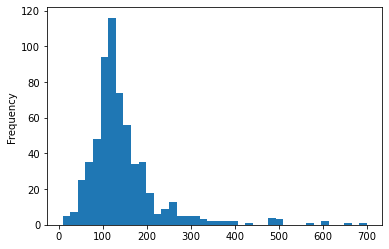

In [29]:
df.LoanAmount.plot.hist(bins = 40)

In [30]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*100.0 if x > 30.0 else x*3)

In [31]:
df.LoanAmount  = df.LoanAmount.apply(lambda x: x*0.75 if x > 7000.0 else x*3)

In [32]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*0.60 if x > 12000.0 else x*1)

In [33]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*10.0 if x > 0.0 else x*1)

In [34]:
df.LoanAmount  = df.LoanAmount.apply(lambda x: x*0.6 if x > 120000.0 else x*1)

<AxesSubplot:ylabel='Frequency'>

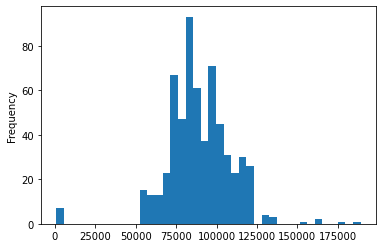

In [35]:
df.LoanAmount.plot.hist(bins = 40)

In [36]:
df.LoanAmount  = df.LoanAmount.apply(lambda x: x*0.5 if x > 125000.0 else x*1)

In [37]:
df.LoanAmount  = df.LoanAmount.apply(lambda x: x*17.0 if x < 40000.0 else x*1)

In [38]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*2.0 if x < 30000.0 else x*1)

In [39]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*1.4 if x > 50000.0 else x*1)

<AxesSubplot:ylabel='Frequency'>

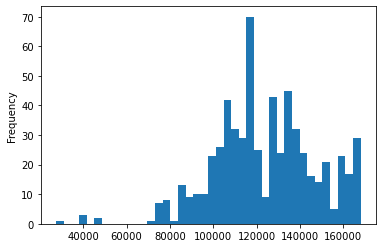

In [40]:
df.LoanAmount.plot.hist(bins = 40)

In [41]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*2.0 if x < 50000.0 else x*1)

In [42]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*0.6 if x > 90000.0 else x*1)

In [43]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*0.6 if x > 94000.0 else x*1)

In [44]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*0.6 if x > 0.0 else x*1)

In [45]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*0.9 if x > 0.0 else x*1)

In [46]:
df.LoanAmount = df.LoanAmount.apply(lambda x: x*1.5 if x > 0.0 else x*1)

<AxesSubplot:ylabel='Frequency'>

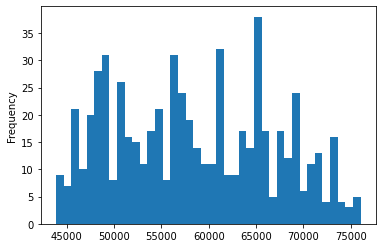

In [47]:
df.LoanAmount.plot.hist(bins = 40)

In [48]:
df['Fahrzeugwert'] = df.LoanAmount

In [49]:
df.Loan_Amount_Term = df.Loan_Amount_Term.apply(lambda x: x/10)

<AxesSubplot:>

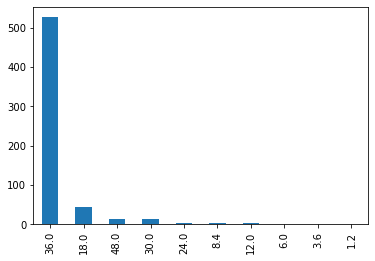

In [50]:
df.Loan_Amount_Term.value_counts().plot(kind='bar')

In [51]:
df = df.loc[df['Loan_Amount_Term'] > 23.0]

<AxesSubplot:>

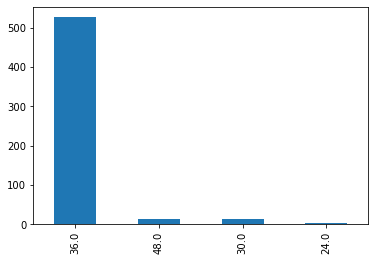

In [52]:
df.Loan_Amount_Term.value_counts().plot(kind='bar')

In [53]:
df['leasing_monat_48M'] = df.Fahrzeugwert / 48
df['leasing_summe'] = df['leasing_monat_48M'] * df['Loan_Amount_Term']
df['leasingrate'] = (df['leasing_summe'] / df['Loan_Amount_Term'])/2
df['einkommen_025'] = df['ApplicantIncome'] * 0.25

In [54]:
df = df.drop(['LoanAmount', 'leasing_summe', 'leasing_monat_48M'], axis=1)

## Set the right dtype for features

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             558 non-null    object 
 1   Married            558 non-null    object 
 2   Dependents         558 non-null    object 
 3   Education          558 non-null    object 
 4   Self_Employed      558 non-null    object 
 5   ApplicantIncome    558 non-null    int64  
 6   CoapplicantIncome  558 non-null    float64
 7   Loan_Amount_Term   558 non-null    float64
 8   Property_Area      558 non-null    object 
 9   Fahrzeugwert       558 non-null    float64
 10  leasingrate        558 non-null    float64
 11  einkommen_025      558 non-null    float64
 12  label              558 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 61.0+ KB


In [109]:
df = df.astype({"Gender": 'category', "Married": 'category', "Dependents": 'category', "Education": 'category', "Self_Employed": 'category', "CoapplicantIncome": 'int64', "Loan_Amount_Term": 'int64', "Property_Area": 'category'})

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             558 non-null    category
 1   Married            558 non-null    category
 2   Dependents         558 non-null    category
 3   Education          558 non-null    category
 4   Self_Employed      558 non-null    category
 5   ApplicantIncome    558 non-null    int64   
 6   CoapplicantIncome  558 non-null    int64   
 7   Loan_Amount_Term   558 non-null    int64   
 8   Property_Area      558 non-null    category
 9   Fahrzeugwert       558 non-null    float64 
 10  leasingrate        558 non-null    float64 
 11  einkommen_025      558 non-null    float64 
 12  label              558 non-null    object  
dtypes: category(6), float64(3), int64(3), object(1)
memory usage: 39.0+ KB


## Create custom label with conditions

In [55]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,einkommen_025
0,Male,No,0,Graduate,No,5849,0.0,36.0,Urban,65318.400,680.400000,1462.25
1,Male,Yes,1,Graduate,No,4583,1508.0,36.0,Rural,65318.400,680.400000,1145.75
2,Male,Yes,0,Graduate,Yes,3000,0.0,36.0,Urban,48498.912,505.197000,750.00
3,Male,Yes,0,Not Graduate,No,2583,2358.0,36.0,Urban,61236.000,637.875000,645.75
4,Male,No,0,Graduate,No,6000,0.0,36.0,Urban,71952.300,749.503125,1500.00
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,36.0,Rural,55112.400,574.087500,808.00
609,Female,No,0,Graduate,No,2900,0.0,36.0,Rural,60385.500,629.015625,725.00
611,Male,Yes,1,Graduate,No,8072,240.0,36.0,Urban,46478.124,484.147125,2018.00
612,Male,Yes,2,Graduate,No,7583,0.0,36.0,Urban,57255.660,596.413125,1895.75


In [103]:
conditions = [
    (df['leasingrate'] > df['einkommen_025']) | (df['Self_Employed'] == 'Yes') & (df['Property_Area'] == 'Urban') & (df['Education'] == "Not Graduate"),
    (df['Loan_Amount_Term'] > 0)
    ]
                                         
values = ['Risk', 'No Risk']

# create a new column and use np.select to assign values to it using -> lists as arguments
df['label'] = np.select(conditions, values)

df.head(50)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Property_Area,Fahrzeugwert,leasingrate,einkommen_025,label
0,Male,No,0,Graduate,No,5849,0.0,36.0,Urban,65318.400,680.400000,1462.25,No Risk
1,Male,Yes,1,Graduate,No,4583,1508.0,36.0,Rural,65318.400,680.400000,1145.75,No Risk
2,Male,Yes,0,Graduate,Yes,3000,0.0,36.0,Urban,48498.912,505.197000,750.00,No Risk
3,Male,Yes,0,Not Graduate,No,2583,2358.0,36.0,Urban,61236.000,637.875000,645.75,No Risk
4,Male,No,0,Graduate,No,6000,0.0,36.0,Urban,71952.300,749.503125,1500.00,No Risk
5,Male,Yes,2,Graduate,Yes,5417,4196.0,36.0,Urban,49050.036,510.937875,1354.25,No Risk
6,Male,Yes,0,Not Graduate,No,2333,1516.0,36.0,Urban,48478.500,504.984375,583.25,No Risk
7,Male,Yes,3+,Graduate,No,3036,2504.0,36.0,Semiurban,48376.440,503.921250,759.00,No Risk
8,Male,Yes,2,Graduate,No,4006,1526.0,36.0,Urban,51438.240,535.815000,1001.50,No Risk
9,Male,Yes,1,Graduate,No,12841,10968.0,36.0,Semiurban,64114.092,667.855125,3210.25,No Risk


No Risk    471
Risk        87
Name: label, dtype: int64

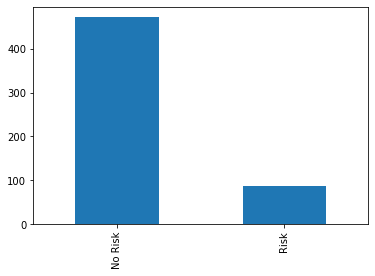

In [104]:
df.label.value_counts().plot(kind='bar')
df.label.value_counts()

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             558 non-null    category
 1   Married            558 non-null    category
 2   Dependents         558 non-null    category
 3   Education          558 non-null    category
 4   Self_Employed      558 non-null    category
 5   ApplicantIncome    558 non-null    int64   
 6   CoapplicantIncome  558 non-null    int64   
 7   Loan_Amount_Term   558 non-null    int64   
 8   Property_Area      558 non-null    category
 9   Fahrzeugwert       558 non-null    float64 
 10  leasingrate        558 non-null    float64 
 11  einkommen_025      558 non-null    float64 
 12  label              558 non-null    object  
dtypes: category(6), float64(3), int64(3), object(1)
memory usage: 39.0+ KB


In [113]:
df.to_csv(r'/Users/cenkyagkan/Desktop/OMM/7.Semester/Applied Data Analytics/Leasing_risk/Final_data/dataset_leasingrisk.csv', index = False)

In [114]:
dfsub = df[['Gender', 'ApplicantIncome', 'leasingrate']]

In [115]:
dfsub.to_csv(r'/Users/cenkyagkan/Desktop/OMM/7.Semester/Applied Data Analytics/Clustering/subdataset_customersegmentation.csv', index = False)